In [3]:
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import folium

ImportError: No module named seaborn

In [3]:
%matplotlib inline

In [4]:
uber_data_apr14_df = pd.read_csv('C:/Study/Fall_16/Python/Uber_Data/ud_14/uber-raw-data-apr14.csv')
uber_data_may14_df = pd.read_csv('C:/Study/Fall_16/Python/Uber_Data/ud_14/uber-raw-data-may14.csv')
uber_data_jun14_df = pd.read_csv('C:/Study/Fall_16/Python/Uber_Data/ud_14/uber-raw-data-jun14.csv')
uber_data_jul14_df = pd.read_csv('C:/Study/Fall_16/Python/Uber_Data/ud_14/uber-raw-data-jul14.csv')
uber_data_aug14_df = pd.read_csv('C:/Study/Fall_16/Python/Uber_Data/ud_14/uber-raw-data-aug14.csv')
uber_data_sep14_df = pd.read_csv('C:/Study/Fall_16/Python/Uber_Data/ud_14/uber-raw-data-sep14.csv')
uber_data_janjun15_df = pd.read_csv('C:/Study/Fall_16/Python/Uber_Data/uber-raw-data-janjune-15.csv')

In [5]:
uber_data_janjun15_df.head()


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [8]:
# Merge multiple files
path = r'C:/Study/Fall_16/Python/Uber_Data/ud_14'                     
all_files = glob.glob(path + "/*.csv")    

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [9]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [10]:
def num_missing(x):
    return sum(x.isnull())
print ' Number of null values per column'
print concatenated_df.apply(num_missing, axis=0)
#uber_data_apr14_df.isnull().sum()

 Number of null values per column
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [11]:
uber_data_aug14_df['Date/Time'] = pd.to_datetime(uber_data_aug14_df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data_aug14_df['DayofWeekNum'] = uber_data_aug14_df['Date/Time'].dt.dayofweek
uber_data_aug14_df['DayOfWeek'] = uber_data_aug14_df['Date/Time'].dt.weekday_name
uber_data_aug14_df['DayNum'] = uber_data_aug14_df['Date/Time'].dt.day
uber_data_aug14_df['HourOfDay'] = uber_data_aug14_df['Date/Time'].dt.hour


In [12]:
uber_data_aug14_df['DayNum'].head()


0    1
1    1
2    1
3    1
4    1
Name: DayNum, dtype: int64

In [13]:
uber_data_aug14_df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

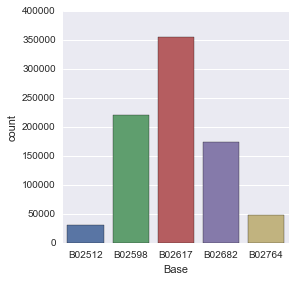

In [14]:
sns.factorplot(x='Base', data=uber_data_aug14_df, kind='count')

In [16]:
uber_week_data = uber_data_aug14_df.pivot_table(index=['DayofWeekNum','DayOfWeek'], values='Base', aggfunc='count')
uber_week_data

DayofWeekNum  DayOfWeek
0             Monday        91633
1             Tuesday      107124
2             Wednesday    115256
3             Thursday     124117
4             Friday       148674
5             Saturday     132225
6             Sunday       110246
Name: Base, dtype: int64

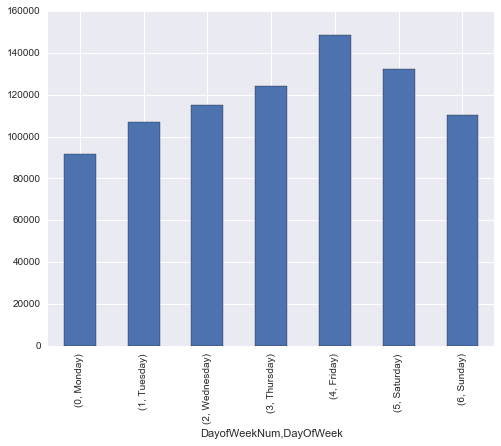

In [17]:
uber_week_data.plot(kind='bar', figsize=(8,6))
plt.xlabel=('Journeys by Week day')
plt.ylabel=('Total Journeys')


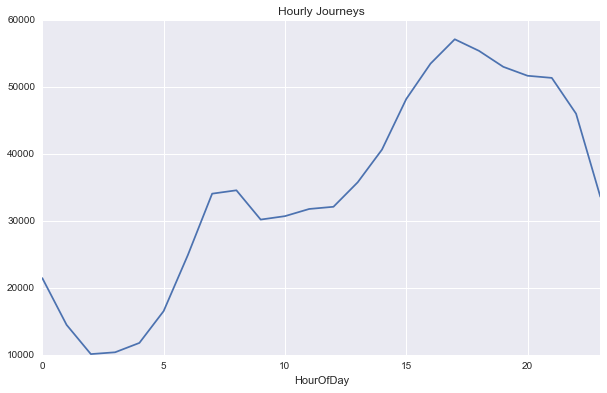

In [18]:
uber_hourly_data = uber_data_aug14_df.pivot_table(index=['HourOfDay'], values='Base', aggfunc='count')
uber_hourly_data.plot(kind='line', figsize=(10,6), title='Hourly Journeys')
plt.xlabel=('Hours')
plt.ylabel=('Total of Journeys')


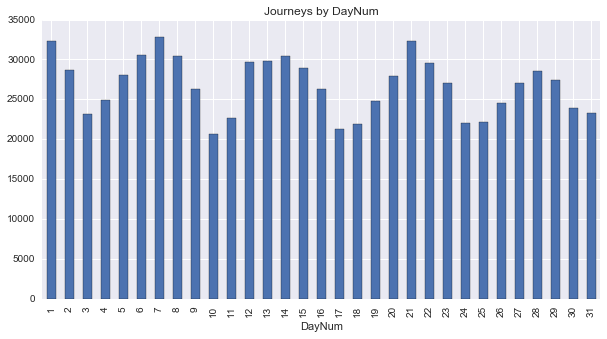

In [19]:
uber_day_data = uber_data_aug14_df.pivot_table(index=['DayNum'], values='Base', aggfunc='count')
uber_day_data.plot(kind='bar', figsize=(10,5), title='Journeys by DayNum')
plt.xlabel=('Days')
plt.ylabel=('Total Journeys')

Analysis of Data from April to September 2014

In [20]:
concatenated_df['Date/Time']= pd.to_datetime(concatenated_df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
concatenated_df['Month'] = concatenated_df['Date/Time'].dt.month
concatenated_df['HourOfDay'] = concatenated_df['Date/Time'].dt.hour

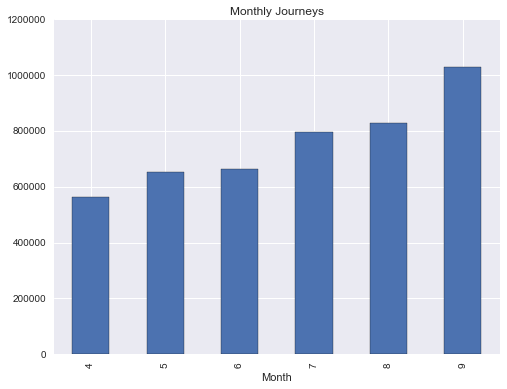

In [21]:
concatenated_apr_sep_month_df = concatenated_df.pivot_table(index=['Month'], values='Base', aggfunc='count')
concatenated_apr_sep_month_df.plot(kind='bar', figsize=(8,6), title='Monthly Journeys')
plt.xlabel=('Month')
plt.ylabel=('Total Journeys')

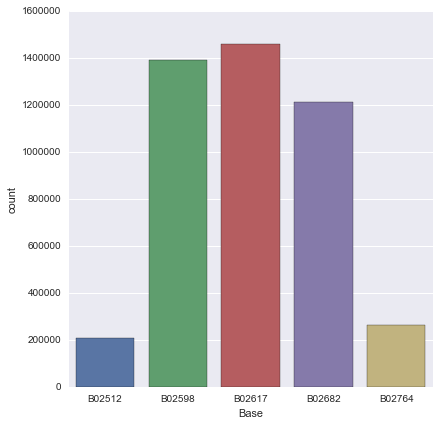

In [137]:
sns.factorplot(x='Base', data = concatenated_df, kind='count',size=6)

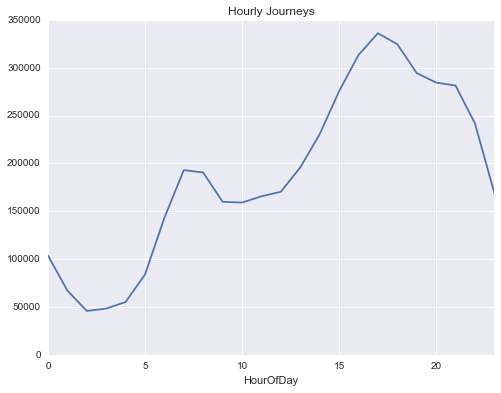

In [22]:
concatenated_apr_sep_hour_df = concatenated_df.pivot_table(index=['HourOfDay'], values='Base', aggfunc='count')
concatenated_apr_sep_hour_df.plot(kind='line', figsize=(8,6), title='Hourly Journeys')
plt.xlabel=('Hours')
plt.ylabel=('Total Journeys')

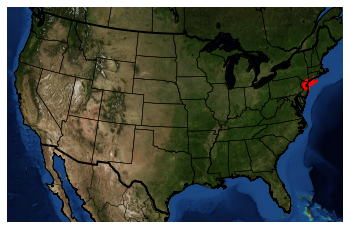

In [26]:
# Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
# Draw coastlines, and the edges of the map.
m.bluemarble()
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()
#m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
x, y = m(list(concatenated_df["Lon"].astype(float)), list(concatenated_df["Lat"].astype(float)))
# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()

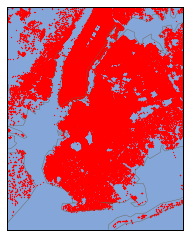

In [30]:
# https://www.packtpub.com/books/content/plotting-geographical-data-using-basemap
m = Basemap(projection='merc',llcrnrlat=40.55,urcrnrlat=40.82,
            llcrnrlon=-74.1, urcrnrlon=-73.82, lat_ts=40.5,resolution='h')
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
#m.drawrivers(color='#6D5F47', linewidth=.4)
#m.fillcontinents(color='white',lake_color='#85A6D9')
x, y = m(list(concatenated_df["Lon"].astype(float)), list(concatenated_df["Lat"].astype(float)))
# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
plt.show()

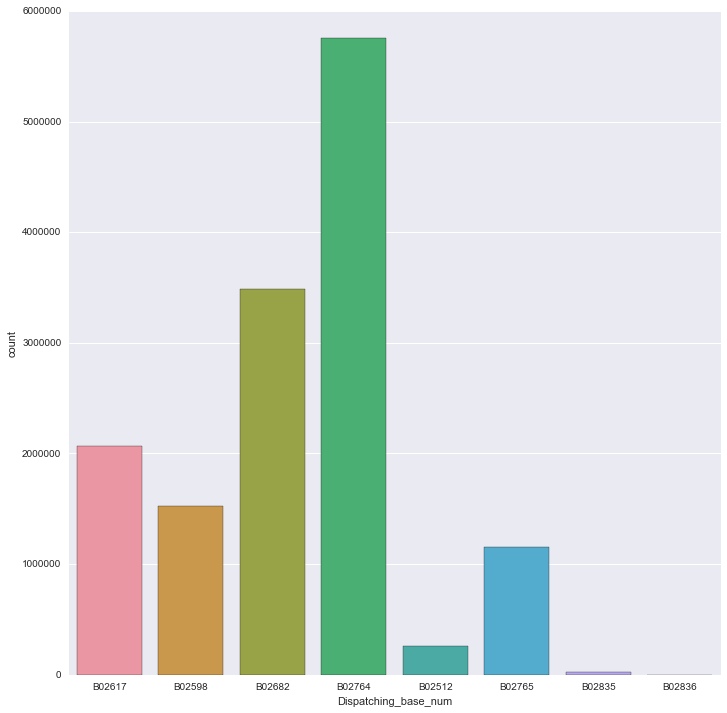

In [32]:
sns.factorplot(x='Dispatching_base_num', data=uber_data_janjun15_df, kind='count', size=10)